In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [18]:
import pandas as pd
#df = pd.read_csv('US AIRLINE.csv')
df = pd.read_csv('US AIRLINE.csv')
df.head(100)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,569910981868060673,negative,1.0000,Customer Service Issue,0.6863,Virgin America,NaN,MerchEngines,NaN,0,"@VirginAmerica Is it me, or is your website do...",NaN,2015-02-23 09:25:41 -0800,"Los Angeles, CA",Arizona
96,569909224521641984,negative,1.0000,Customer Service Issue,0.6771,Virgin America,NaN,ColorCartel,NaN,0,@VirginAmerica I can't check in or add a bag. ...,NaN,2015-02-23 09:18:42 -0800,"Austin, TX",Mountain Time (US & Canada)
97,569907336485019648,negative,1.0000,Can't Tell,0.6590,Virgin America,NaN,MustBeSpoken,NaN,0,@VirginAmerica - Let 2 scanned in passengers l...,NaN,2015-02-23 09:11:12 -0800,NaN,NaN
98,569896805611089920,negative,1.0000,Flight Booking Problems,0.6714,Virgin America,NaN,mattbunk,NaN,0,@virginamerica What is your phone number. I ca...,NaN,2015-02-23 08:29:21 -0800,"Sterling Heights, MI",Eastern Time (US & Canada)


In [14]:
X1=df['tweet_id']
X2=df['airline_sentiment_confidence']
X_training=np.array(list(zip(X1,X2)))
X_training

array([[5.70306134e+17, 1.00000000e+00],
       [5.70301131e+17, 3.48600000e-01],
       [5.70301084e+17, 6.83700000e-01],
       ...,
       [5.69587243e+17, 1.00000000e+00],
       [5.69587189e+17, 1.00000000e+00],
       [5.69587140e+17, 6.77100000e-01]])

In [15]:
y_training=df['airline_sentiment_confidence']
y_training

0        1.0000
1        0.3486
2        0.6837
3        1.0000
4        1.0000
          ...  
14635    0.3487
14636    1.0000
14637    1.0000
14638    1.0000
14639    0.6771
Name: airline_sentiment_confidence, Length: 14640, dtype: float64

In [19]:
target_names=['-1','+1']
target_names

['-1', '+1']

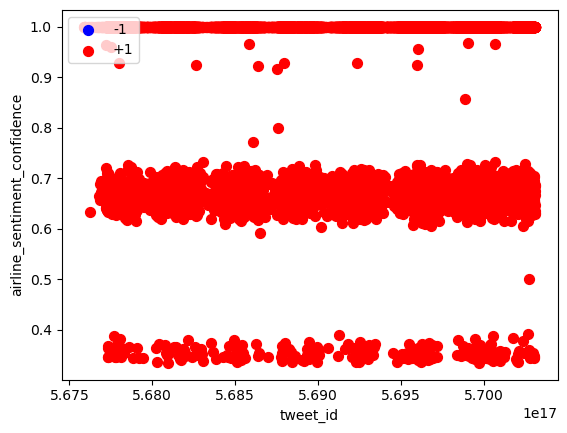

In [20]:
idxPlus=y_training[y_training<0].index
idxMin=y_training[y_training>0].index
plt.scatter(X_training[idxPlus,0],X_training[idxPlus,1],c='b',s=50)
plt.scatter(X_training[idxMin,0],X_training[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)
plt.xlabel('tweet_id')
plt.ylabel('airline_sentiment_confidence');
plt.savefig('chart0.png')

In [29]:
X = df.drop('retweet_count', axis=1)
y = df['retweet_count']

In [36]:

df.isna().sum()


tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [37]:

df.describe()


,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [38]:

df.info()   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [19]:

col_names = df.columns

col_names


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [31]:
import seaborn as sns
from sklearn.datasets import load_iris


In [32]:

iris = load_iris()

In [33]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [46]:
X=df.iloc[:, :-1]
X.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN
